# **Lab 2**
## **Multi-precision arithmetic** 
---
---

<br/><br/>

## Decorators and helper utilities :
---

#### 1. Counts the number of times a function is called

In [25]:
def count(func):
    def wrapper(*args, **kwargs):
        wrapper.calls += 1
        return func(*args, **kwargs)
    wrapper.calls = 0
    return wrapper

#### 2. Returns the "wall-clock" execution time of the function

In [26]:
import time
def timer(func):
    def wrapper(*args, **kwargs):
        start = time.time()
        result = func(*args, **kwargs)
        end = time.time()
        # print(f"Took {end - start} seconds")
        return end - start #result
    return wrapper

#### 3. Returns array of digits in specified base

In [27]:
def parse_input(input, base) :
    arr = []
    while input >= base :
        arr.append(input%base)
        input = input//base
    arr.append(input)
    return arr

<br/><br/>

## Declare parameters :
---

#### Declare the base of the machine instructions

In [28]:
base=10

<br/><br/>

## Functions
---

#### Machine operations

In [29]:
@count
def add_mac(a, b) :
    c = a + b
    return c%base, c//base

@count
def mul_mac(a, b) :
    c = a * b
    return c%base, c//base

#### Fundamental functions and recursion thereof

In [30]:
def add1(alpha, beta, c) :
    r = add_mac(alpha[0], beta[0])
    s = add_mac(r[0], c)
    t = add_mac(r[1], s[1])
    # assert t[1] == 0  # comment out
    if len(beta) == 1 : return [s[0], t[0]]
    return [s[0]] + add1(alpha[1:], beta[1:], t[0])

# def add1(a, b, c) :
#     if len(a)==0 : return [c]
#     c0, d0 = add_mac(a[0], b[0])
#     # print(c0, d0)
#     c1, d1 = add_mac(c0, c)
#     # print(c1, d1)
#     c2, d2 = add_mac(d1, d0)
#     # print(c2, d2)
#     assert d2 == 0
#     return [c1] + add1(a[1:], b[1:], c2) # if len(a) > 1 else [c1, c2]
#     # else : return [c1, c2]

def mul1(a, beta, c) :
    r = mul_mac(a,beta[0])
    s = add_mac(r[0],c)
    t = add_mac(r[1],s[1])
    if len(beta) == 1 : return [s[0], t[0]]
    return [s[0]] + mul1(a, beta[1:], t[0])

#### Arbitrary precision interger arithmetic functions

In [31]:
def add(alpha, beta) :
    la, lb = len(alpha), len(beta)
    l = max(la, lb)
    alpha = alpha + (l-la) * [0]
    beta = beta + (l-lb) * [0]
    return add1(alpha, beta, 0)

def mul(alpha, beta) :
    r = mul1(alpha[0], beta,0)
    if len(alpha) == 1 : return r
    s = [0] + mul(alpha[1:], beta)
    return add(r, s)

#### Wrapped functions to measure time of execution

In [32]:
@timer
def add_time(alpha, beta) :
    add(alpha, beta)

@timer
def mul_time(alpha, beta) :
    mul(alpha, beta)

<br/><br/>

## Unit testing :
---

In [33]:
parse_input(123450, base)

[0, 5, 4, 3, 2, 1]

In [34]:
add_mac.calls = 0 # reset counter
mul_mac.calls # expected 0

0

In [35]:
add_mac(0, 0) # expected 0, i.e. (0, 0)

(0, 0)

In [36]:
add_mac(9, 9) # expected 18, i.e. (8, 1)

(8, 1)

In [37]:
add_mac.calls # expected 2

2

In [38]:
mul_mac(0, 0) # expected 0, i.e. (0, 0)

(0, 0)

In [39]:
mul_mac(9, 9) # expected 81, i.e. (1, 8)

(1, 8)

In [40]:
add([0], [0]) # expected 0, i.e. [0, 0]

[0, 0]

In [41]:
add([1, 9], [9, 9]) # expected 190, i.e. [0, 9, 1]

[0, 9, 1]

In [42]:
mul([0], [0]) # expected 0, i.e. [0, 0]

[0, 0]

In [43]:
mul([9, 9], [9, 9]) # expected 9801, i.e. [1, 0, 8, 9]

[1, 0, 8, 9, 0]

In [44]:
mul_time([9, 9], [9, 9]) # expected a small postive value (~1e-6)

2.1457672119140625e-05

<br/><br/>

## Plotting (time complexities) :
---

### **1. Addition**

#### *Generate data (addition of two random numbers of a given length)*

In [45]:
from random import uniform
input_lengths = range(1, 51)
num_adds = []
add_times = []

print('input_len \t add_mac calls \t time (s)')

for input_length in input_lengths :
    add_mac.calls = 0
    num1 = int(uniform(10**(input_length-1), 10**input_length))
    num2 = int(uniform(10**(input_length-1), 10**input_length))
    add_time_taken = add_time(parse_input(num1, base), parse_input(num2, base))
    add_times.append(add_time_taken)
    num_adds.append(add_mac.calls)
    print(f'{input_length:02d} \t\t {add_mac.calls:04d} \t\t {add_time_taken:.2e}')

input_len 	 add_mac calls 	 time (s)
01 		 0003 		 8.34e-06
02 		 0006 		 5.96e-06
03 		 0009 		 5.96e-06
04 		 0012 		 7.15e-06
05 		 0015 		 7.39e-06
06 		 0018 		 7.15e-06
07 		 0021 		 9.30e-06
08 		 0024 		 1.07e-05
09 		 0027 		 9.30e-06
10 		 0030 		 1.07e-05
11 		 0033 		 1.19e-05
12 		 0036 		 1.43e-05
13 		 0039 		 1.55e-05
14 		 0042 		 1.43e-05
15 		 0045 		 1.53e-05
16 		 0048 		 1.55e-05
17 		 0051 		 1.88e-05
18 		 0054 		 3.34e-05
19 		 0057 		 2.03e-05
20 		 0060 		 2.00e-05
21 		 0063 		 2.26e-05
22 		 0066 		 2.24e-05
23 		 0069 		 2.38e-05
24 		 0072 		 2.38e-05
25 		 0075 		 2.62e-05
26 		 0078 		 2.62e-05
27 		 0081 		 2.50e-05
28 		 0084 		 2.74e-05
29 		 0087 		 2.74e-05
30 		 0090 		 2.84e-05
31 		 0093 		 3.77e-05
32 		 0096 		 3.93e-05
33 		 0099 		 3.79e-05
34 		 0102 		 3.79e-05
35 		 0105 		 3.24e-05
36 		 0108 		 3.43e-05
37 		 0111 		 3.46e-05
38 		 0114 		 3.81e-05
39 		 0117 		 3.70e-05
40 		 0120 		 3.67e-05
41 		 0123 		 3.79e-05
42 		 0126 		 3.93e-

#### *Plotting the data*

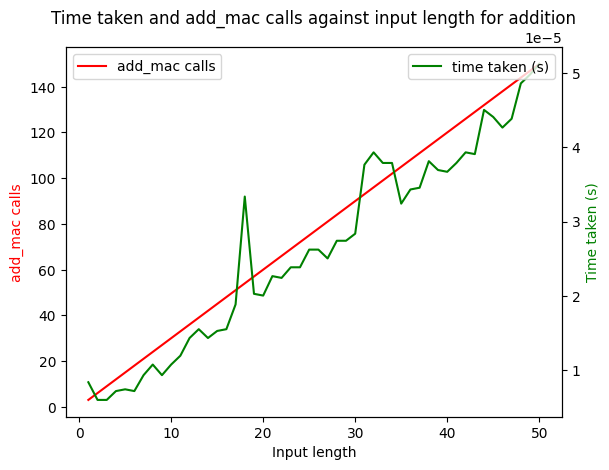

In [46]:
import matplotlib.pyplot as plt

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

ax1.plot(input_lengths, num_adds, 'r-')
ax2.plot(input_lengths, add_times, 'g-')

ax1.set_xlabel('Input length')
ax1.set_ylabel('add_mac calls', color='r')
ax2.set_ylabel('Time taken (s)', color='g')
ax1.legend(['add_mac calls'])
ax2.legend(['time taken (s)'], loc='upper right')

plt.title('Time taken and add_mac calls against input length for addition')
plt.show() # linear trends !

### **2. Multiplication**

#### *Generate data (multiplying the largest n-digit number with itself)*

In [47]:
input_lengths = range(1, 51)
num_adds = []
num_muls = []
mul_times = []

print('input_len \t add_mac calls \t mul_mac calls \t time (s)')

for input_length in input_lengths :
    add_mac.calls, mul_mac.calls = 0, 0
    mul_time_taken = mul_time(parse_input(10**input_length-1, base), parse_input(10**input_length-1, base))
    mul_times.append(mul_time_taken)
    num_adds.append(add_mac.calls)
    num_muls.append(mul_mac.calls)
    print(f'{input_length:02d} \t\t {add_mac.calls:04d} \t\t {mul_mac.calls:04d} \t\t {mul_time_taken:.2e}')

input_len 	 add_mac calls 	 mul_mac calls 	 time (s)
01 		 0002 		 0001 		 8.34e-06
02 		 0020 		 0004 		 1.57e-05
03 		 0054 		 0009 		 2.24e-05
04 		 0104 		 0016 		 3.81e-05
05 		 0170 		 0025 		 5.82e-05
06 		 0252 		 0036 		 8.32e-05
07 		 0350 		 0049 		 1.16e-04
08 		 0464 		 0064 		 1.56e-04
09 		 0594 		 0081 		 1.91e-04
10 		 0740 		 0100 		 2.49e-04
11 		 0902 		 0121 		 2.94e-04
12 		 1080 		 0144 		 4.05e-04
13 		 1274 		 0169 		 4.46e-04
14 		 1484 		 0196 		 4.81e-04
15 		 1710 		 0225 		 5.70e-04
16 		 1952 		 0256 		 1.05e-03
17 		 2210 		 0289 		 7.62e-04
18 		 2484 		 0324 		 8.96e-04
19 		 2774 		 0361 		 9.64e-04
20 		 3080 		 0400 		 1.08e-03
21 		 3402 		 0441 		 1.21e-03
22 		 3740 		 0484 		 1.30e-03
23 		 4094 		 0529 		 1.45e-03
24 		 4464 		 0576 		 1.58e-03
25 		 4850 		 0625 		 2.19e-03
26 		 5252 		 0676 		 1.87e-03
27 		 5670 		 0729 		 2.19e-03
28 		 6104 		 0784 		 2.21e-03
29 		 6554 		 0841 		 2.38e-03
30 		 7020 		 0900 		 3.01e-03
31 		 7502 		 096

#### *Plotting the data*

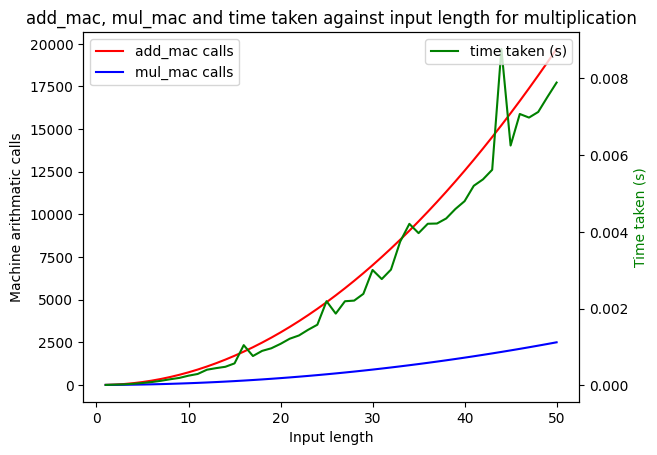

In [48]:
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

ax1.plot(input_lengths, num_adds, 'r-')
ax1.plot(input_lengths, num_muls, 'b-')
ax2.plot(input_lengths, mul_times, 'g-')

ax1.set_xlabel('Input length')
ax1.set_ylabel('Machine arithmatic calls')
ax2.set_ylabel('Time taken (s)', color='g')
ax1.legend(['add_mac calls', 'mul_mac calls'])
ax2.legend(['time taken (s)'], loc='upper right')

plt.title('add_mac, mul_mac and time taken against input length for multiplication')
plt.show() # quadratic complexity !